In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [7]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("./Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")

y_train = open_labels("./Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0

In [8]:
y_train

array([False,  True,  True, ..., False,  True, False])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd",loss="binary_crossentropy")

In [16]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train.reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
model.fit(X_train.reshape(60000,784),
         y_train,
          epochs=10,
          batch_size=1000
         )

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2828
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1790
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1507
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1403
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1351
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1266
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1262
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1228
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1196
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1165


In [39]:
test_d = X_train[3]

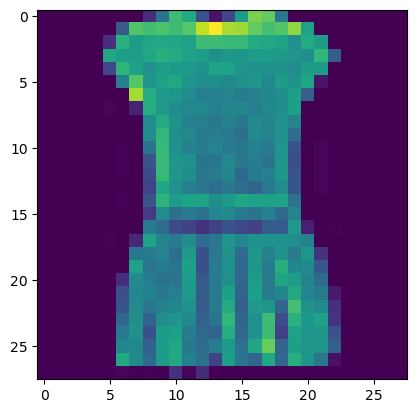

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(test_d)
plt.show()

In [41]:
model.predict(test_d.reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.25264925]], dtype=float32)